<a href="https://colab.research.google.com/github/lk-learner/AMII-Machine-Learning-Technician-1/blob/main/TEAM2_PA2_Final_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMII - Machine Learning Technician 1
## PA 2: Decision Trees
Due Date: Friday, November 6, 2020, 5pm

## Fall 2020 - Team 2


Dataset selected: 

### NASA Turbofan Jet Engine Data Set: Run to Failure Degradation Simulation
https://www.kaggle.com/behrad3d/nasa-cmaps





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Engine Type 1

In [ ]:
import pandas as pd

In [ ]:
column_headers=['Unit_Number','Time_in_Cycles','OP Setting_1','OP Setting_2','OP Setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']

In [ ]:
FD1_df=pd.read_csv('/content/drive/My Drive/archive/CMaps/train_FD001.txt',sep=' ', index_col=False, names=column_headers)

In [ ]:
def Calculate_RUL(engine_dataframe):
  """ Calculate Remaining Useful life for the given engine data.

      Assumes that the dataframe has columns ['Unit_Number', 'Time_in_Cycles']"""

  #Add a new column for the Time to Failure and RUL values
  engine_dataframe['Time_to_Failure'] = 0

  #Group data by unit number and grab the maximum cycles for each unit as an array
  trainingt_t2f = engine_dataframe.groupby(['Unit_Number']).max()['Time_in_Cycles'].to_numpy()

  #Loop throught the t2f array and assign the value to the Time to Failure column for each unit
  for unit, t2f in enumerate(trainingt_t2f, start=1):
    is_unit = (engine_dataframe['Unit_Number'] == unit)
    engine_dataframe.loc[is_unit, 'Time_to_Failure'] = t2f

  #Calculate the RUL by taking the difference between Time to Failure and RUL
  engine_dataframe['RUL'] = engine_dataframe['Time_to_Failure'] - engine_dataframe['Time_in_Cycles']

  return  engine_dataframe

In [ ]:
FD1_df = Calculate_RUL(FD1_df)

In [ ]:
FD1_df.describe()

Unit_Number  Time_in_Cycles  ...  Time_to_Failure           RUL
count  20631.000000    20631.000000  ...     20631.000000  20631.000000
mean      51.506568      108.807862  ...       216.615724    107.807862
std       29.227633       68.880990  ...        50.028600     68.880990
min        1.000000        1.000000  ...       128.000000      0.000000
25%       26.000000       52.000000  ...       185.000000     51.000000
50%       52.000000      104.000000  ...       207.000000    103.000000
75%       77.000000      156.000000  ...       240.000000    155.000000
max      100.000000      362.000000  ...       362.000000    361.000000

[8 rows x 28 columns]

## Engine Type 2

In [ ]:
FD2_train_df1=pd.read_csv('/content/drive/My Drive/archive/CMaps/train_FD002.txt',sep=' ', index_col=False, names=column_headers)

In [ ]:
FD2_train_df1 = Calculate_RUL(FD2_train_df1)

In [ ]:
FD2_train_df1.describe()

Unit_Number  Time_in_Cycles  ...  Time_to_Failure           RUL
count  53759.000000    53759.000000  ...     53759.000000  53759.000000
mean     131.082981      109.154746  ...       217.309492    108.154746
std       74.463862       69.180569  ...        50.517618     69.180569
min        1.000000        1.000000  ...       128.000000      0.000000
25%       68.000000       52.000000  ...       183.000000     51.000000
50%      131.000000      104.000000  ...       206.000000    103.000000
75%      195.000000      157.000000  ...       246.000000    156.000000
max      260.000000      378.000000  ...       378.000000    377.000000

[8 rows x 28 columns]

## Engine Type 3

In [ ]:
# load dataset 3
FD3_df = pd.read_csv('/content/drive/My Drive/archive/CMaps/train_FD003.txt', sep=' ',index_col=False, names=column_headers)


In [ ]:
FD3_df = Calculate_RUL(FD3_df)

In [ ]:
FD3_df.describe()


Unit_Number  Time_in_Cycles  ...  Time_to_Failure           RUL
count  24720.000000    24720.000000  ...     24720.000000  24720.000000
mean      48.631877      139.077063  ...       277.154126    138.077063
std       29.348985       98.846675  ...       100.537886     98.846675
min        1.000000        1.000000  ...       145.000000      0.000000
25%       23.000000       62.000000  ...       197.000000     61.000000
50%       47.000000      124.000000  ...       253.000000    123.000000
75%       74.000000      191.000000  ...       324.000000    190.000000
max      100.000000      525.000000  ...       525.000000    524.000000

[8 rows x 28 columns]

## Engine Type 4

In [ ]:
FD4_train_df1 = pd.read_csv('/content/drive/My Drive/archive/CMaps/train_FD004.txt',sep=' ',index_col=False, names=column_headers)

In [ ]:
FD4_train_df1 = Calculate_RUL(FD4_train_df1)

In [ ]:
FD4_train_df1.describe()

Unit_Number  Time_in_Cycles  ...  Time_to_Failure           RUL
count  61249.000000    61249.000000  ...     61249.000000  61249.000000
mean     124.325181      134.311417  ...       267.622835    133.311417
std       71.995350       89.783389  ...        79.231517     89.783389
min        1.000000        1.000000  ...       128.000000      0.000000
25%       60.000000       62.000000  ...       202.000000     61.000000
50%      126.000000      123.000000  ...       259.000000    122.000000
75%      185.000000      191.000000  ...       313.000000    190.000000
max      249.000000      543.000000  ...       543.000000    542.000000

[8 rows x 28 columns]

#**<font color='blue'>START OF PA2**

#Combined Engine Data

To construct various models for the QuAM, all four engine types need to be combined. We used training datasets to split into training and test data for this assignment. To retrieve the dataset for each engine type in the combined  data, we will add a new column storing the engine type.

In [ ]:
engine_type_column = 'Engine_Type'
FD1_df[engine_type_column] = 1
FD2_train_df1[engine_type_column] = 2
FD3_df[engine_type_column] = 3
FD4_train_df1[engine_type_column] = 4


engines_data = [FD1_df, FD2_train_df1, FD3_df, FD4_train_df1]
engine_df = pd.concat(engines_data)

In [ ]:
print(engine_df['Engine_Type'].unique())

[1 2 3 4]


## Operational Setting Categories

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(engine_df, x='OP Setting_1', color='Engine_Type')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=0, b=0))
fig.show()

fig = px.histogram(engine_df, x='OP Setting_2', color='Engine_Type')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=0, b=0))
fig.show()

fig = px.histogram(engine_df, x='OP Setting_3', color='Engine_Type')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=0, b=0))
fig.show()


There are a total of 6 combinations of operating conditions:

Condition 1: Op_Setting_1 ~ 0, Op_Setting_2 ~ 0, Op_Setting_3 = 100

Condition 2: Op_Setting_1 ~ 10, Op_Setting_2 ~ 0.25, Op_Setting_3 = 100

Condition 3: Op_Setting_1 ~ 20, Op_Setting_2 ~ 0.7, Op_Setting_3 = 100

Condition 4: Op_Setting_1 ~ 25, Op_Setting_2 ~ 0.62, Op_Setting_3 = 60

Condition 5: Op_Setting_1 ~ 35 Op_Setting_2 ~ 0.84, Op_Setting_3 = 100

Condition 6: Op_Setting_1 ~ 42, Op_Setting_2 ~ 0.84, Op_Setting_3 = 100


In [ ]:
Operating_Conditions = [1,2,3,4,5,6]

Op1_limits = [[-0.2,0.2],
              [9.8, 10.2],
              [19.8, 20.2],
              [24.8, 25.2],
              [34.8, 35.2],
              [41.8, 42.2]]

Op2_limits = [[-0.005, 0.004],
              [0.245, 0.254],
              [0.695, 0.704],
              [0.615, 0.624],
              [0.835, 0.844],
              [0.835, 0.844]]

Op3_limits = [100,100,100,60,100,100]


In [ ]:
def Calculate_Operating_Condition(Engine_Data, LimitsOP1, LimitsOP2, LimitsOP3):
  """
  This function will create three different boolean filters based on the supplied
  setting limits and return a combination filter

  Assumes that Engine_Data has columns called 'OP Setting_1', 'OP Setting_2', 
  'OP Setting_3'

  Also, assumes the OP limits have two values = [lower limit, higher limit]
  """
#  print(LimitsOP1)
#  print(LimitsOP2)
#  print(LimitsOP3)
  
  OP1_values = Engine_Data['OP Setting_1']
  within_OP1 = (OP1_values >= LimitsOP1[0]) & (OP1_values <= LimitsOP1[1])
  
  OP2_values = Engine_Data['OP Setting_2']
  within_OP2 = (OP2_values >= LimitsOP2[0]) & (OP2_values <= LimitsOP2[1])
  
  OP3_values = Engine_Data['OP Setting_3']
  within_OP3 = (OP3_values == LimitsOP3)
  
  filter = within_OP1 & within_OP2 & within_OP3

#  print('Op1 values: ', within_OP1.unique())
#  print('Op2 values: ', within_OP2.unique())
#  print('Op3 values: ', within_OP3.unique())
#  print(filter.unique())
#  print('----')
  return within_OP1 & within_OP2 & within_OP3

In [ ]:
engine_df['OP_Condition'] = 0
for index, condition in enumerate(Operating_Conditions):
  condition_filter = Calculate_Operating_Condition(engine_df, Op1_limits[index], Op2_limits[index], Op3_limits[index])

  engine_df.loc[condition_filter, 'OP_Condition'] = index + 1

In [ ]:
fig = px.histogram(engine_df, x='OP Setting_1', color='OP_Condition')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=1, b=0))
fig.show()

fig = px.histogram(engine_df, x='OP Setting_2', color='OP_Condition')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=1, b=0))
fig.show()

fig = px.histogram(engine_df, x='OP Setting_3', color='OP_Condition')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=1, b=0))
fig.show()

#Feature Engineering

In [ ]:
import numpy as np

Additional features are created to combine the available sensor and operation settings data into more relevent variables and to reduce the number of features used in the QuAMs. 

The type of features created are categorized into atmospheric, conservative, performance, and dimensional reduction features.

##Atmospheric Features

Atmospheric features are derived from the operating settings and the physical properties of the atmosphere outside of the engine. The primary feature in this category is the mass flow rate of air entering the fan of the engine. To calculate this, we need the density of the air, speed of sound at the inlet temperature, and air speed. 

The atmosphere is assumed to be dry air modeled as an ideal gas with constant thermal properties. The variables that we need are calculated from the following equations:

\begin{align}
\rho_2 & = \frac{P_2}{R* T_2}\\
c & = \sqrt{ \gamma*R*T_2} \\
v_2 & = Ma * c \\
\dot{m_2} &= \rho_2 * v_2
\end{align}


Where R is the gas constant (equal to 53.35 ft-lbf / (lb-R)) and $\gamma$ is the heat capacity ratio (equal to 1.40) for air. 

In [ ]:
#Atmospheric constants
R = 53.35 #(ft-lbf) / (lb-R)
gamma = 1.4

atm_feature_names = ['rho2', 'v_sound', 'u2', 'mdot_2']

In [ ]:
P2 = engine_df['P2']
T2 = engine_df['T2']
rho2 = P2 / (R + T2)  #lbm/ft3
v_sound = np.sqrt(32.174 * gamma * R * T2) #ft/s2 
u2= engine_df['OP Setting_2'] * v_sound
mdot_2 = rho2 * u2 #lbm/s

atm_features = pd.concat([rho2, v_sound, u2, mdot_2], axis=1)
atm_features.columns = atm_feature_names
atm_features.head()

rho2      v_sound        u2    mdot_2
0  0.025559  1116.424409 -0.446570 -0.011414
1  0.025559  1116.424409 -0.334927 -0.008560
2  0.025559  1116.424409  0.334927  0.008560
3  0.025559  1116.424409  0.000000  0.000000
4  0.025559  1116.424409 -0.223285 -0.005707

##Conservation Features

Mass flowing through the engine is always conserved. This allows us to use the mass flow into the engine and calculate flow properties throughout the engine. These can be viewed as simulated sensors in addition to the supplied sensors. 

A particular mass flow rate to be considered is the flow through the core, passing through the High Pressure Compressor (HPC) since this is the only engine component degrading in the supplied data set (as detailed in the accompanying report). The health index used to simulate failure in the HPC is directly related to the mass flow and efficiency of the compressor.  

\begin{align}
\dot{m_{fan}} &= \dot{m_2} * BPR \\
\dot{m_{core}} &= \dot{m_2} / BPR \\
\dot{W_T} &= \phi * P_s30
\end{align}

In [ ]:
mass_flow_feature_names = ['mdot_fan', 'mdot_core', 'Fuel_flow']

mdot_fan = mdot_2 * engine_df['BPR']  #lbm/s
mdot_core = mdot_2 / engine_df['BPR'] #lbm/s
Wf = engine_df['phi'] * engine_df['Ps30'] #lbm/s

mass_flow_features = pd.concat([mdot_fan, mdot_core, Wf], axis=1)
mass_flow_features.columns = mass_flow_feature_names
mass_flow_features.head()

mdot_fan  mdot_core   Fuel_flow
0 -0.096097  -0.001356  24763.2002
1 -0.072178  -0.001015  24803.0772
2  0.072059   0.001017  24694.7934
3  0.000000   0.000000  24642.3918
4 -0.048105  -0.000677  24689.1432

##Performance Features
To understand and quantify the performance of the components, we need to do a thermodynamic analysis of the air moving through engine. The thermodynamic cycle shown below, called the [Brayton Cycle](https://en.wikipedia.org/wiki/Brayton_cycle) represents the fundamental process of turbofan engines. The plots on the right show how the pressure, temperature, and entropy of the air changes as it moves through the engine core.

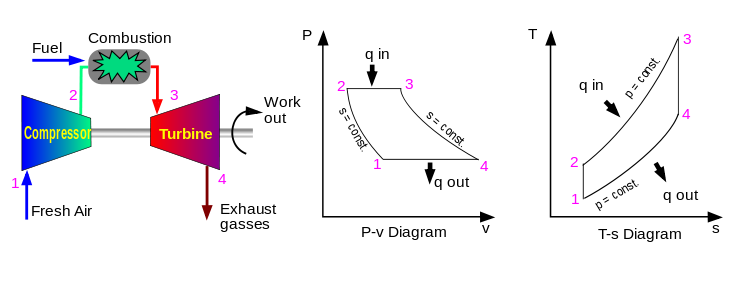

The efficiency of the HPC is a critical feature as it is directly related to the health index used to determine the remaining useful life of the engine. We assume adiabatic and reversible (also known as isentropic) processes. With this simplification we can estimate the efficieny using the temperatures at the inlet and outlet as per the equations below:

\begin{align}
\eta_{LPC} &= 1-\frac{T_2}{T_{24}} \\
\eta_{HPC} &= 1-\frac{T_{24}}{T_{30}} \\
\end{align}

In [ ]:
engine_feature_names = ['eLPC', 'eHPC', ]

eLPC = 1.0 - (engine_df['T2'] / engine_df['T24'])
eHPC = 1.0 - (engine_df['T24'] / engine_df['T30'])

engine_features = pd.concat([eLPC, eHPC], axis=1)
engine_features.columns = engine_feature_names
engine_features.head()

eLPC      eHPC
0  0.191876  0.596263
1  0.192292  0.596594
2  0.192543  0.595495
3  0.192543  0.594166
4  0.192568  0.594169

##Dimension Reduction Features

These features are created to reduce the feature space of the problem.

The fan speed and demanded fan speed can be combined into an fan speed error feature, as show below. As the demanded fan speed is a constant value, the distribution of the fan speed error should be directly proportional to the distribution of the fan speed.

\begin{align}
N^f_{error} &= N^f - N^f_{dmd}
\end{align}

In [ ]:
reduction_feature_names = ['Nf_err']

Nf_err = np.abs(engine_df['Nf_dmd'] - engine_df['Nf'])

reduction_feature = pd.DataFrame({'Nf_err': Nf_err})
reduction_feature.head()

Nf_err
0    0.06
1    0.04
2    0.08
3    0.11
4    0.06

We can now combine all of the new features with the sensor data.

In [ ]:
engine_df2 = pd.concat([engine_df, atm_features, engine_features, reduction_feature], axis = 1)
engine_df2.head()

Unit_Number  Time_in_Cycles  OP Setting_1  ...      eLPC      eHPC  Nf_err
0            1               1       -0.0007  ...  0.191876  0.596263    0.06
1            1               2        0.0019  ...  0.192292  0.596594    0.04
2            1               3       -0.0043  ...  0.192543  0.595495    0.08
3            1               4        0.0007  ...  0.192543  0.594166    0.11
4            1               5       -0.0019  ...  0.192568  0.594169    0.06

[5 rows x 37 columns]

#Decision Tree Model

##Business Objective: Risk Assessment

A decision tree is used to group the engines into risk categories based on the remaining useful life (RUL) using the operational and sensor parameters. 

These risk categories can be used to prioitize engine maintenance and prepare for replacement before the QuAM predicts engine failure. They can also be used as an administrative tool to focus monitoring of high risk engines.

The proposed risk categories are High, Medium, and Low and the RUL thresholds are determine by observing the histogram of RUL values.

In [ ]:
print(engine_df2['RUL'].describe())
fig = px.histogram(engine_df2, x='RUL', color='OP_Condition')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=1, b=0))
fig.show()

count    160359.000000
mean        122.331338
std          83.538146
min           0.000000
25%          56.000000
50%         113.000000
75%         172.000000
max         542.000000
Name: RUL, dtype: float64


In [ ]:
risk_levels = {'High': 56.0, 'Medium': 83.0, 'Low': 172.0}

In [ ]:
DT_category_name = 'Risk_Level'
DT_label = 'RUL'
engine_df2[DT_category_name] = "Risk Needed"
RUL_Series = engine_df2[DT_label]

low_risk = (RUL_Series >= risk_levels['Low'])
med_risk = (RUL_Series >= risk_levels['High']) & (RUL_Series < risk_levels['Low'])
high_risk = (RUL_Series < risk_levels['High'])

engine_df2.loc[high_risk, DT_category_name] = 'High'
engine_df2.loc[med_risk, DT_category_name] = 'Medium'
engine_df2.loc[low_risk, DT_category_name] = 'Low'

In [ ]:
fig = px.histogram(engine_df2, x='RUL', color='Risk_Level')
fig.update_layout(height=300, margin=dict(l=0, r=0, t=1, b=0))
fig.show()

## Decision Tree Features

We can drop the following features as they are either constant values providing no usable information for the decision tree, irrelent to the categorizing process, or were used to created more useful features.

In [ ]:
engine_df2.columns

Index(['Unit_Number', 'Time_in_Cycles', 'OP Setting_1', 'OP Setting_2',
       'OP Setting_3', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf',
       'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed',
       'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32', 'Time_to_Failure', 'RUL',
       'Engine_Type', 'OP_Condition', 'rho2', 'v_sound', 'u2', 'mdot_2',
       'eLPC', 'eHPC', 'Nf_err', 'Risk_Level'],
      dtype='object')

In [ ]:
dropped_features = ['Unit_Number', 'Time_in_Cycles', 'OP Setting_3',
                    'T2', 'P2', 'P15', 'phi', 'epr', 'farB',
                    'Nf_dmd', 'PCNfR_dmd', 'NRc', 'NRf', 'Engine_Type', 'OP_Condition',
                    'Time_to_Failure', 'rho2', 'v_sound', 'u2', 'htBleed' ,'RUL', 'Risk_Level']
 
DT_feature_names = engine_df2.columns.to_list()
for feature in dropped_features:
  DT_feature_names.remove(feature)

engine_df2[DT_feature_names].head()

OP Setting_1  OP Setting_2     T24  ...      eLPC      eHPC  Nf_err
0       -0.0007       -0.0004  641.82  ...  0.191876  0.596263    0.06
1        0.0019       -0.0003  642.15  ...  0.192292  0.596594    0.04
2       -0.0043        0.0003  642.35  ...  0.192543  0.595495    0.08
3        0.0007        0.0000  642.35  ...  0.192543  0.594166    0.11
4       -0.0019       -0.0002  642.37  ...  0.192568  0.594169    0.06

[5 rows x 16 columns]

In [ ]:
engine_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160359 entries, 0 to 61248
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unit_Number      160359 non-null  int64  
 1   Time_in_Cycles   160359 non-null  int64  
 2   OP Setting_1     160359 non-null  float64
 3   OP Setting_2     160359 non-null  float64
 4   OP Setting_3     160359 non-null  float64
 5   T2               160359 non-null  float64
 6   T24              160359 non-null  float64
 7   T30              160359 non-null  float64
 8   T50              160359 non-null  float64
 9   P2               160359 non-null  float64
 10  P15              160359 non-null  float64
 11  P30              160359 non-null  float64
 12  Nf               160359 non-null  float64
 13  Nc               160359 non-null  float64
 14  epr              160359 non-null  float64
 15  Ps30             160359 non-null  float64
 16  phi              160359 non-null  float

We create a correlation matrix for the remaining features. 



In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

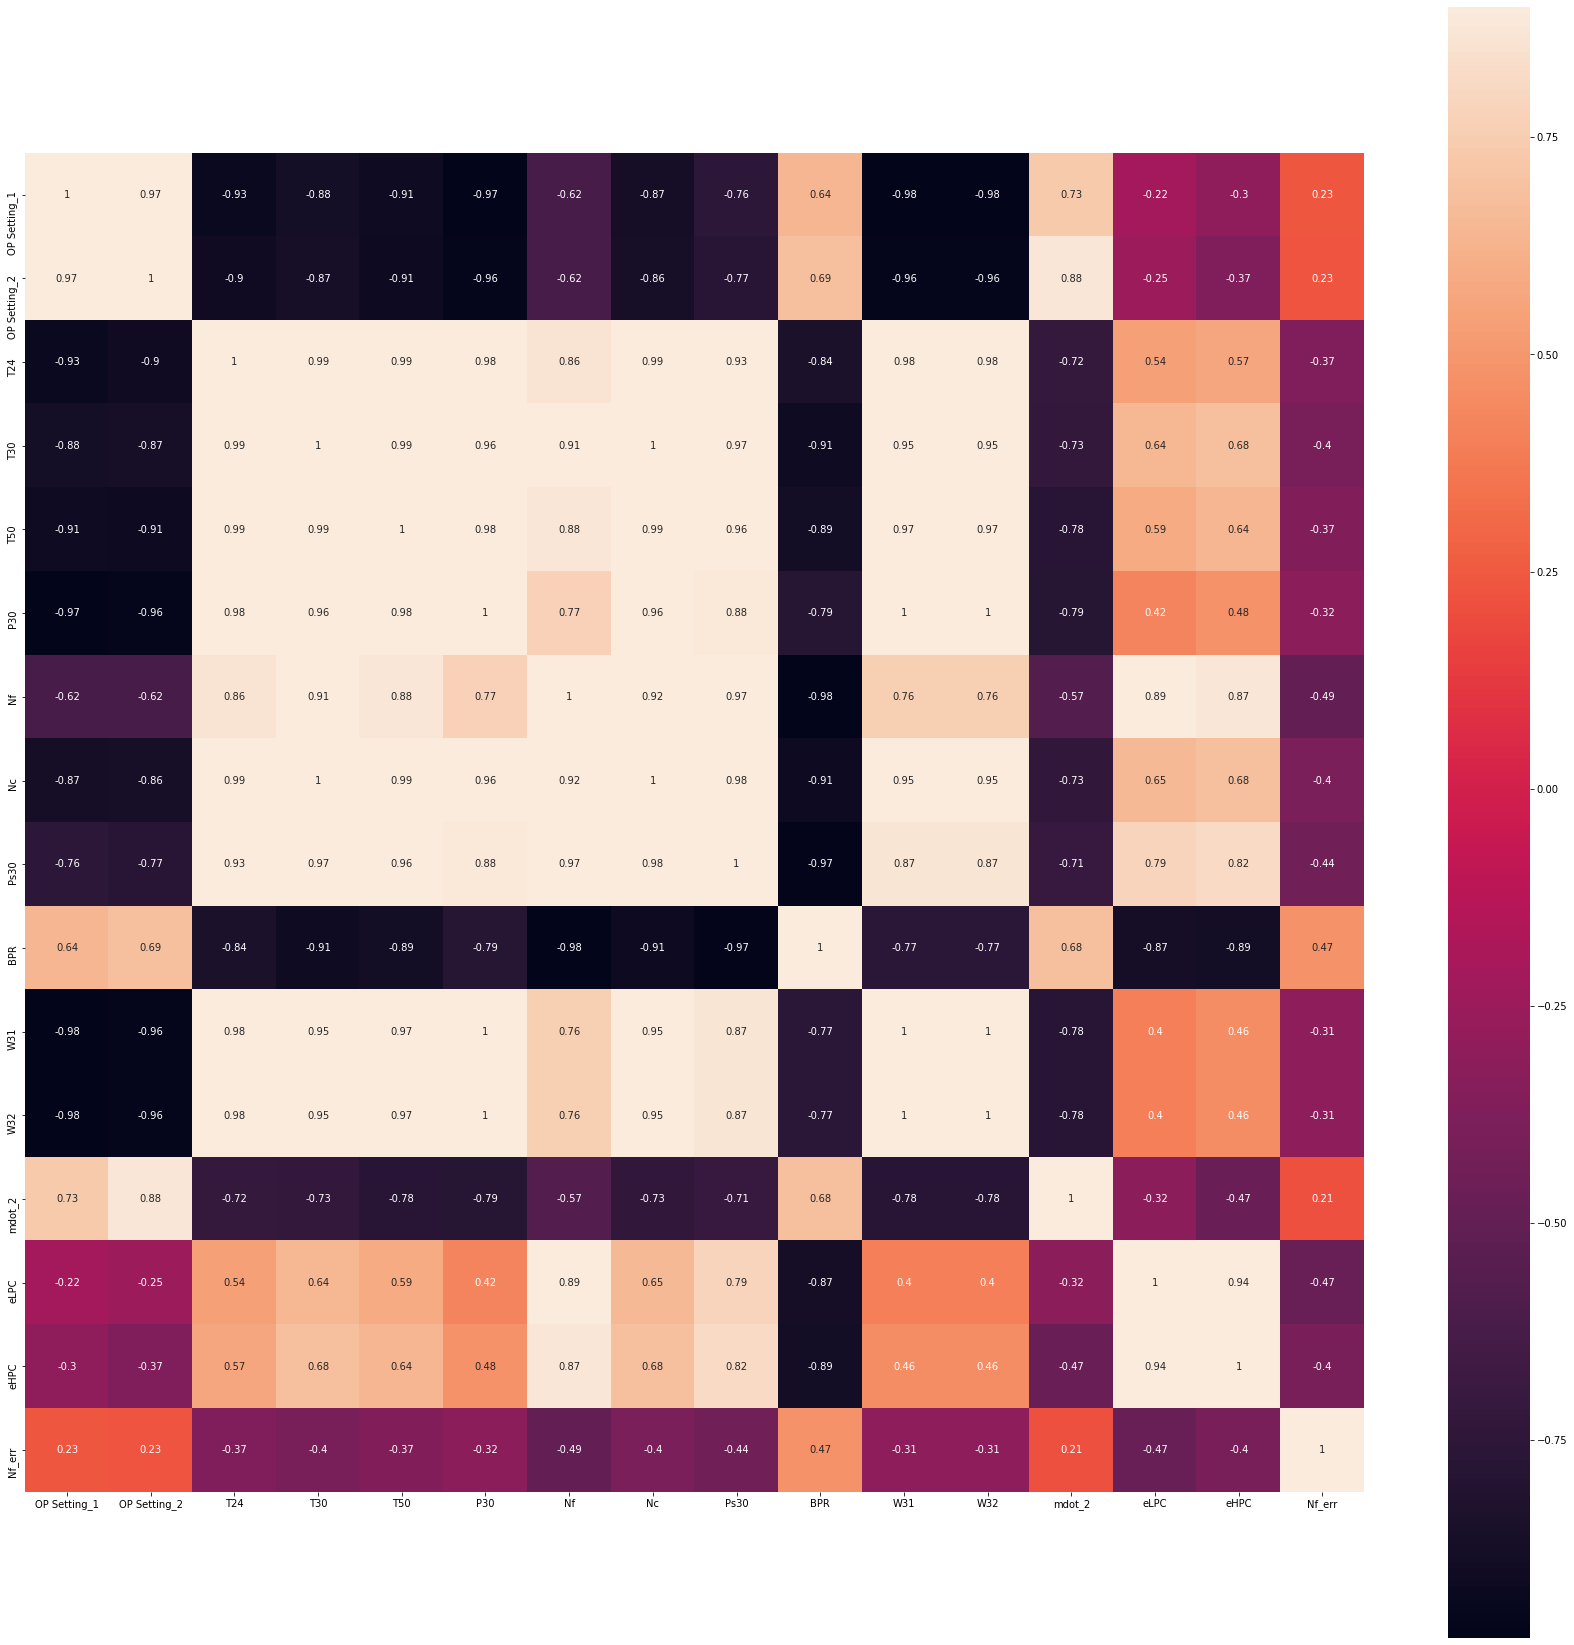

In [ ]:
corr_mat = engine_df2[DT_feature_names].corr()
plt.figure(figsize=(30,30))
ax=sns.heatmap(corr_mat, vmax = 0.9, square=True, annot=True)
plt.show()


##<font color='blue'> Split your data into testing and training.

## Train/Test Data Split

In [ ]:
engine_df2[DT_feature_names]

OP Setting_1  OP Setting_2     T24  ...      eLPC      eHPC  Nf_err
0           -0.0007       -0.0004  641.82  ...  0.191876  0.596263    0.06
1            0.0019       -0.0003  642.15  ...  0.192292  0.596594    0.04
2           -0.0043        0.0003  642.35  ...  0.192543  0.595495    0.08
3            0.0007        0.0000  642.35  ...  0.192543  0.594166    0.11
4           -0.0019       -0.0002  642.37  ...  0.192568  0.594169    0.06
...             ...           ...     ...  ...       ...       ...     ...
61244        9.9998        0.2500  605.33  ...  0.192094  0.600801    0.66
61245        0.0028        0.0015  643.42  ...  0.193886  0.597591    0.47
61246        0.0029        0.0000  643.68  ...  0.194211  0.599632    0.51
61247       35.0046        0.8400  555.77  ...  0.191320  0.597644    0.78
61248       42.0030        0.8400  549.85  ...  0.190688  0.598576    0.52

[160359 rows x 16 columns]

In [ ]:
engine_df2[DT_category_name]

0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
61244    High
61245    High
61246    High
61247    High
61248    High
Name: Risk_Level, Length: 160359, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(engine_df2[DT_feature_names].values,
                                                    engine_df2[DT_category_name].values,
                                                    test_size = 0.20)

##<font color ='blue'> Determine whether your label data needs to be discretized as we did with the Boston Housing dataset during L3-2.

Data needs to be discretized as we are classifying risk based on the remaining useful life (RUL) to maximize the operating lifetime of the engines.

## Exploring Decision Tree Construction

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import plotly.express as px
import graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_preprocess = LabelEncoder()

labels=list(y_preprocess.fit_transform(list(risk_levels.keys())))
labels


[0, 2, 1]

Below is helper function to evaluate a given Decision Tree based on precision, recall, and F1 score.

In [ ]:
def Evaluate_DT(DecisionTree, X_train, y_train, yhat_train, 
                X_test, y_test, yhat_test, Context, Show_CM = True):
  """
  Prints the context string and then calculates accuracy, precision, recall, 
  F1 score and plots the confusion matrix for a given Decision Tree.

  """
  print(Context)
  print("Accuracy on training data:", accuracy_score(y_train, yhat_train).round(4))
  print("Precision on training data:", precision_score(y_train, yhat_train, average=None).round(4))
  print("Recall on training data:", recall_score(y_train, yhat_train, average=None).round(4))
  print("F1 score on training data:", f1_score(y_train, yhat_train, average=None).round(4))
  if Show_CM == True:
    plot_confusion_matrix(DecisionTree, X_train, y_train, labels=labels)
  print("Accuracy on test data:", accuracy_score(y_test, yhat_test).round(4))
  print("Precision on test data:", precision_score(y_test, yhat_test, average=None).round(4))
  print("Recall on test data:", recall_score(y_test, yhat_test, average=None).round(4))
  print("F1 score on test data:", f1_score(y_test, yhat_test, average=None).round(4))
  if Show_CM == True:
    plot_confusion_matrix(DecisionTree, X_test, y_test, labels=labels)
  print('---------------------')

# <font color ='blue'> 1. Vary the criterion hyperparameter

In [ ]:
context = "--- Gini Criterion ---"
engine_DT = DecisionTreeClassifier(criterion='gini')
engine_DT.fit(X_train, y_train)
yhat_train = engine_DT.predict(X_train)
yhat_test = engine_DT.predict(X_test)
Evaluate_DT(engine_DT, X_train, y_train, yhat_train, X_test, y_test, yhat_test, context)

--- Gini Criterion ---
Accuracy on training data: 1.0
Precision on training data: [1. 1. 1.]
Recall on training data: [1. 1. 1.]
F1 score on training data: [1. 1. 1.]


ValueError: ignored

--- Entropy Criterion ---
Accuracy on training data: 1.0
Precision on training data: [1. 1. 1.]
Recall on training data: [1. 1. 1.]
F1 score on training data: [1. 1. 1.]
Accuracy on test data: 0.6341
Precision on test data: [0.7742 0.479  0.6451]
Recall on test data: [0.7811 0.4882 0.636 ]
F1 score on test data: [0.7776 0.4835 0.6405]
---------------------


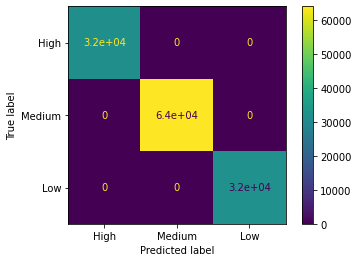

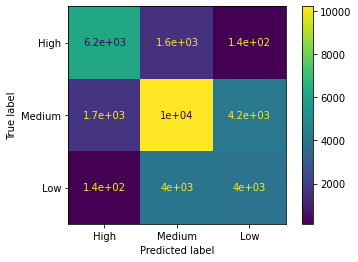

In [ ]:
context = "--- Entropy Criterion ---"
engine_DT = DecisionTreeClassifier(criterion='entropy')
engine_DT.fit(X_train, y_train)
yhat_train = engine_DT.predict(X_train)
yhat_test = engine_DT.predict(X_test)
Evaluate_DT(engine_DT, X_train, y_train, yhat_train, X_test, y_test, yhat_test, context)

Varying the criterion had little impact on the performance of the decision trees since both overfitted the training data. The entropy criterion performed slightly better in this instance.

# <font color ='blue'> 2. Vary the splitter hyperparameter

--- Best Splitter ---
Accuracy on training data: 1.0
Precision on training data: [1. 1. 1.]
Recall on training data: [1. 1. 1.]
F1 score on training data: [1. 1. 1.]
Accuracy on test data: 0.6357
Precision on test data: [0.7722 0.4812 0.6473]
Recall on test data: [0.7834 0.4877 0.6382]
F1 score on test data: [0.7778 0.4844 0.6427]
---------------------


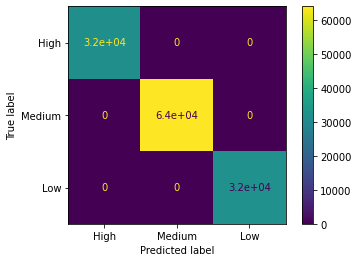

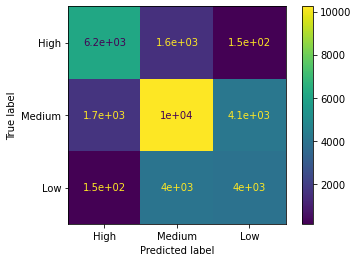

In [ ]:
context = "--- Best Splitter ---"
engine_DT = DecisionTreeClassifier(splitter= 'best')
engine_DT.fit(X_train, y_train)
yhat_train = engine_DT.predict(X_train)
yhat_test = engine_DT.predict(X_test)
Evaluate_DT(engine_DT, X_train, y_train, yhat_train, X_test, y_test, yhat_test, context)

--- Random Splitter ---
Accuracy on training data: 1.0
Precision on training data: [1. 1. 1.]
Recall on training data: [1. 1. 1.]
F1 score on training data: [1. 1. 1.]
Accuracy on test data: 0.6267
Precision on test data: [0.7616 0.4731 0.6417]
Recall on test data: [0.7683 0.4947 0.6241]
F1 score on test data: [0.7649 0.4837 0.6328]
---------------------


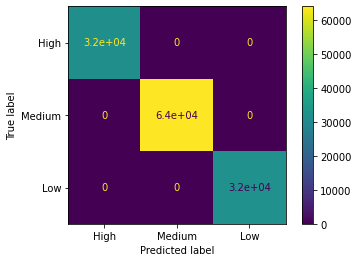

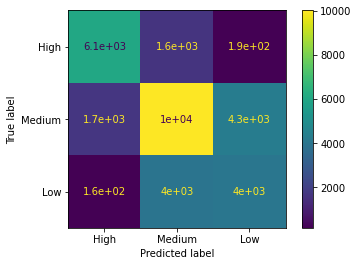

In [ ]:
context = "--- Random Splitter ---"
engine_DT = DecisionTreeClassifier(splitter= 'random')
engine_DT.fit(X_train, y_train)
yhat_train = engine_DT.predict(X_train)
yhat_test = engine_DT.predict(X_test)
Evaluate_DT(engine_DT, X_train, y_train, yhat_train, X_test, y_test, yhat_test, context)

Varying the splitter option also did not have a significant impact of the performance of the decision tree. The F1 score was slightly better using the best option compared to the random option.

# <font color = 'blue'>3. Vary the min_samples_split hyperparameter

(a) Choose value 1 as your min_samples_split and report the accuracy, precision, recall
and F1-score.

Minimum sample split needs to be more than 1 to determine prediction.

(b) Choose value 2 as your min_samples_split and report the accuracy, precision, recall
and F1-score.

In [ ]:
sample_split_sizes = [2,5,10,20]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for index, sample_size in enumerate(sample_split_sizes):
  engine_DT = DecisionTreeClassifier(min_samples_split = sample_size)
  engine_DT.fit(X_train, y_train)
  yhat_train = engine_DT.predict(X_train)
  yhat_test = engine_DT.predict(X_test)

  accuracy_values.append(round(accuracy_score(y_test, yhat_test),4))
  precision_values.append(precision_score(y_test, yhat_test, average=None).round(4))
  recall_values.append(recall_score(y_test, yhat_test, average=None).round(4))
  f1_values.append(f1_score(y_test, yhat_test, average=None).round(4))

results_df = pd.DataFrame({
    'Accuracy': accuracy_values,
    'Precision' : precision_values,
    'Recall' : recall_values,
    'F1' : f1_values,
    'Split_Size': sample_split_sizes
})

results_df

Accuracy                 Precision  ...                        F1 Split_Size
0    0.6377   [0.772, 0.4838, 0.6501]  ...   [0.7782, 0.4875, 0.645]          2
1    0.6343  [0.7642, 0.4803, 0.6497]  ...   [0.7775, 0.4886, 0.638]          5
2    0.6375  [0.7716, 0.4822, 0.6532]  ...   [0.784, 0.4947, 0.6388]         10
3    0.6474   [0.7886, 0.4908, 0.659]  ...  [0.7964, 0.4986, 0.6502]         20

[4 rows x 5 columns]

# <font color = 'blue'> 4. Vary the min_samples_leaf hyperparameter

(a) Choose value 1 as your min_samples_leaf and report the accuracy, precision, recall
and F1-score.

In [ ]:
sample_leaf_sizes = [1,5,10,20]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for index, leaf_size in enumerate(sample_leaf_sizes):
  engine_DT = DecisionTreeClassifier(min_samples_leaf= leaf_size)
  engine_DT.fit(X_train, y_train)
  yhat_train = engine_DT.predict(X_train)
  yhat_test = engine_DT.predict(X_test)

  accuracy_values.append(round(accuracy_score(y_test, yhat_test),4))
  precision_values.append(precision_score(y_test, yhat_test, average=None).round(4))
  recall_values.append(recall_score(y_test, yhat_test, average=None).round(4))
  f1_values.append(f1_score(y_test, yhat_test, average=None).round(4))

results_df = pd.DataFrame({
    'Accuracy': accuracy_values,
    'Precision' : precision_values,
    'Recall' : recall_values,
    'F1' : f1_values,
       'Sample_Leaf_Size': [1,5,10,20]
})

results_df

Accuracy  ... Sample_Leaf_Size
0    0.6369  ...                1
1    0.6440  ...                5
2    0.6657  ...               10
3    0.6822  ...               20

[4 rows x 5 columns]

(b) Choose value 2 as your min_samples_leaf and report the accuracy, precision, recall
and F1-score.

In [ ]:
sample_leaf_sizes = [2,5,10,20]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for index, leaf_size in enumerate(sample_leaf_sizes):
  engine_DT = DecisionTreeClassifier(min_samples_leaf= leaf_size)
  engine_DT.fit(X_train, y_train)
  yhat_train = engine_DT.predict(X_train)
  yhat_test = engine_DT.predict(X_test)

  accuracy_values.append(round(accuracy_score(y_test, yhat_test),4))
  precision_values.append(precision_score(y_test, yhat_test, average=None).round(4))
  recall_values.append(recall_score(y_test, yhat_test, average=None).round(4))
  f1_values.append(f1_score(y_test, yhat_test, average=None).round(4))

results_df = pd.DataFrame({
    'Accuracy': accuracy_values,
    'Precision' : precision_values,
    'Recall' : recall_values,
    'F1' : f1_values,
       'Sample_Leaf_Size': [2,5,10,20]
})

results_df

Accuracy  ... Sample_Leaf_Size
0    0.6284  ...                2
1    0.6437  ...                5
2    0.6651  ...               10
3    0.6829  ...               20

[4 rows x 5 columns]

# <font color='blue'> 5. Vary the max_depth hyperparameter:

(a) Assign a limiting depth, e.g. 4, for our hyperparameter and report the accuracy,
precision, recall and F1-score.

(b) Assign a 2nd limiting depth, e.g. 8, for our hyperparameter and report the accuracy,
precision, recall and F1-score.

In [ ]:
Tree_depths = [5,10,15,20]
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

for index, depth in enumerate(Tree_depths):
  engine_DT = DecisionTreeClassifier(max_depth= depth)
  engine_DT.fit(X_train, y_train)
  yhat_train = engine_DT.predict(X_train)
  yhat_test = engine_DT.predict(X_test)

  accuracy_values.append(round(accuracy_score(y_test, yhat_test),4))
  precision_values.append(precision_score(y_test, yhat_test, average=None).round(4))
  recall_values.append(recall_score(y_test, yhat_test, average=None).round(4))
  f1_values.append(f1_score(y_test, yhat_test, average=None).round(4))

results_df = pd.DataFrame({
    'Accuracy': accuracy_values,
    'Precision' : precision_values,
    'Recall' : recall_values,
    'F1' : f1_values,
       'Max Depth': Tree_depths
})

results_df

Accuracy                 Precision  ...                        F1 Max Depth
0    0.6145  [0.6829, 0.9082, 0.5921]  ...  [0.6693, 0.0216, 0.7143]         5
1    0.6990  [0.8627, 0.6083, 0.6675]  ...  [0.8084, 0.5072, 0.7289]        10
2    0.7011   [0.8531, 0.6076, 0.674]  ...  [0.8116, 0.5239, 0.7263]        15
3    0.6733  [0.8172, 0.5435, 0.6639]  ...  [0.7979, 0.5053, 0.6923]        20

[4 rows x 5 columns]

# <font color = 'blue'> 6. Hyperparameter Overview

The first four experiments (gini, enthropy, best, random) showed that the evaluation metrics between training and test data have big gap with training showing overfitting and having perfect split results and test data showing results around 46%-78% regardless of the evaluation method.

Accuracy, Precision, Recall and F1 Score for high risk_level under each criterion (Gini & Entropy) and splitter (Best & Random) show marginal variations. 


Training splits data shows overfitting results as a result of perfect correlated. By dropping some features (T24, T30, Opsetting2, Ps30, BPR and Nf)
we observed reduced accuracy and precision under both criterion and splitter. This indicates that these features have influence on the predicted results. 

Best accuracy is observed at sample_split and sample_leaf size 20, however, best results are obtained at max_depth size of 15.

##**<font color='blue'>Final Decision Tree & Evaluation**

<font color = 'blue'> 1. Which feature was used for the first split?  

Ps30

<font color = 'blue'> 2. How many leaves are in the optimal classifier/QuAM?

In [ ]:
print (leaf_size)

20


## Optimal Decision Tree

<font color='blue'>3. Produce a confusion_matrix and describe your QuAM’s accuracy in terms of the
number of true and false positives and negatives.



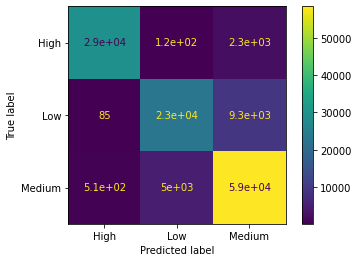

In [ ]:
from sklearn.metrics import plot_confusion_matrix



plot_confusion_matrix(engine_DT, X_train, y_train)


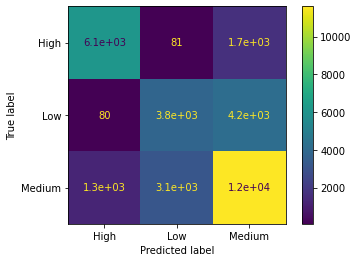

In [ ]:
plot_confusion_matrix(engine_DT, X_test, y_test)

<font color='blue'>4. Using scikit-learn’s classification_report method, generate the accuracy,
precision, recall, and f1-score for your model and describe your QuAM’s accuracy.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

              precision    recall  f1-score   support

        High       0.85      0.79      0.82      7882
      Medium       0.61      0.46      0.52      8142
         Low       0.68      0.79      0.73     16048

    accuracy                           0.71     32072
   macro avg       0.71      0.68      0.69     32072
weighted avg       0.70      0.71      0.70     32072



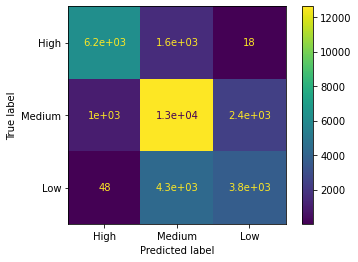

In [ ]:
context = "--- Optimal Tree ---"
engine_DT = DecisionTreeClassifier(criterion='gini',
                                   splitter= 'best',
                                   max_depth = 15, 
                                   min_samples_split = 10,
                                   min_samples_leaf = 10)
engine_DT.fit(X_train, y_train)
yhat_train = engine_DT.predict(X_train)
yhat_test = engine_DT.predict(X_test)
print(classification_report(y_test, yhat_test, target_names=risk_levels.keys()))
plot_confusion_matrix(engine_DT, X_test, y_test, labels=list(risk_levels.keys()))

Looking at Precision, Recall and F1 Score it is shown that high risk level classified better as all of the evaluations are over 79%.  We divided our data into Low, Medium, High  based on 6 different conditions. It is possible that another method to divide data might produce higher QuAM results.

Accuracy score it is shown it is 71%. This is probably due to not enough info was given to measure health index. 

##<font color='blue'>**Visualize the structure of your final QuAM:**

<font color='blue'> 5. Plot your tree. [Hint: using scikit-learn’s tree.plot_tree ]

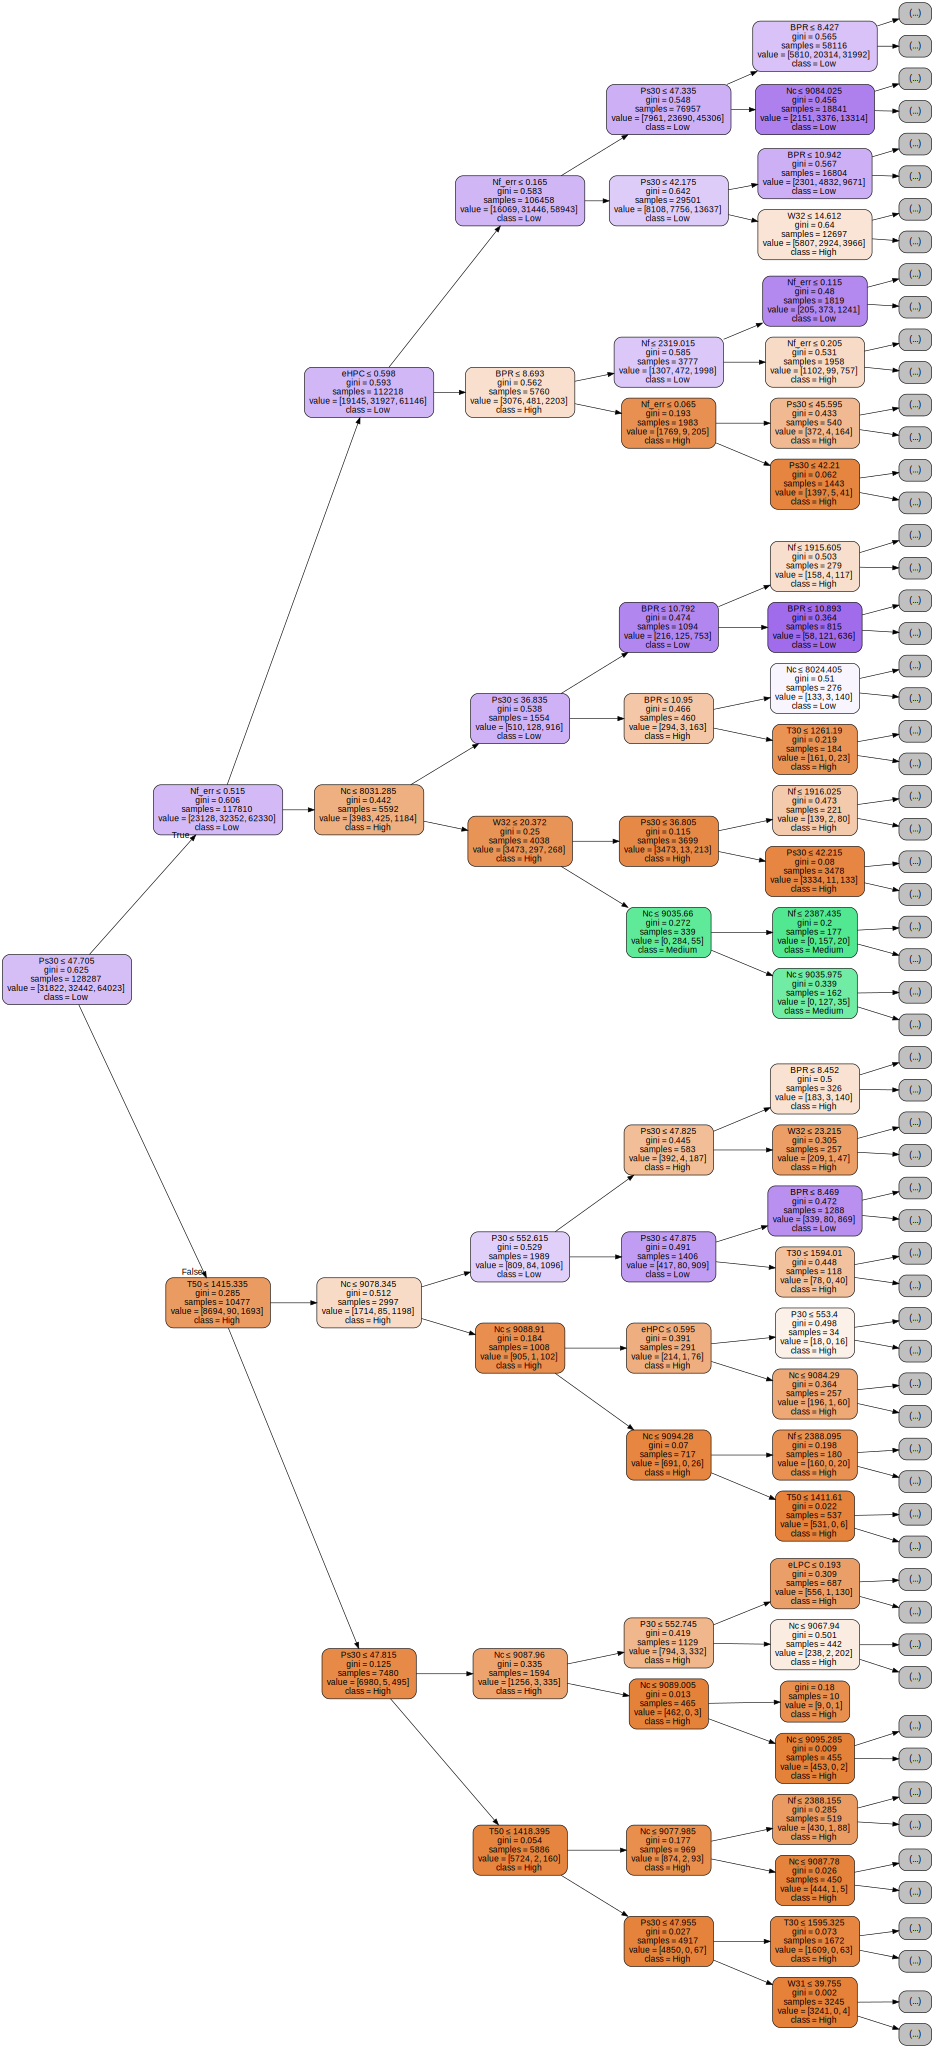

In [ ]:
tree_data = export_graphviz(engine_DT,
                           out_file=None, 
                           class_names=list(risk_levels.keys()),
                           feature_names=DT_feature_names,  
                           filled=True,
                           rounded=True,  
                           special_characters=True,
                           rotate=True,
                          max_depth=5)  
graphviz.Source(tree_data)

In [ ]:
# import sklearn
# import matplotlib.pyplot as plt

# plt.figure(figsize=(50,20), dpi=300)
# sklearn.tree.plot_tree(engine_DT, filled=True)
# plt.show()

<font color='blue'> 6. Plot the decision surface of your tree using paired features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
engine_df2[DT_feature_names].head()

OP Setting_1  OP Setting_2     T24  ...      eLPC      eHPC  Nf_err
0       -0.0007       -0.0004  641.82  ...  0.191876  0.596263    0.06
1        0.0019       -0.0003  642.15  ...  0.192292  0.596594    0.04
2       -0.0043        0.0003  642.35  ...  0.192543  0.595495    0.08
3        0.0007        0.0000  642.35  ...  0.192543  0.594166    0.11
4       -0.0019       -0.0002  642.37  ...  0.192568  0.594169    0.06

[5 rows x 16 columns]

In [ ]:
features_names=engine_df2[DT_feature_names].columns
features_names

Index(['OP Setting_1', 'OP Setting_2', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc',
       'Ps30', 'BPR', 'W31', 'W32', 'mdot_2', 'eLPC', 'eHPC', 'Nf_err'],
      dtype='object')

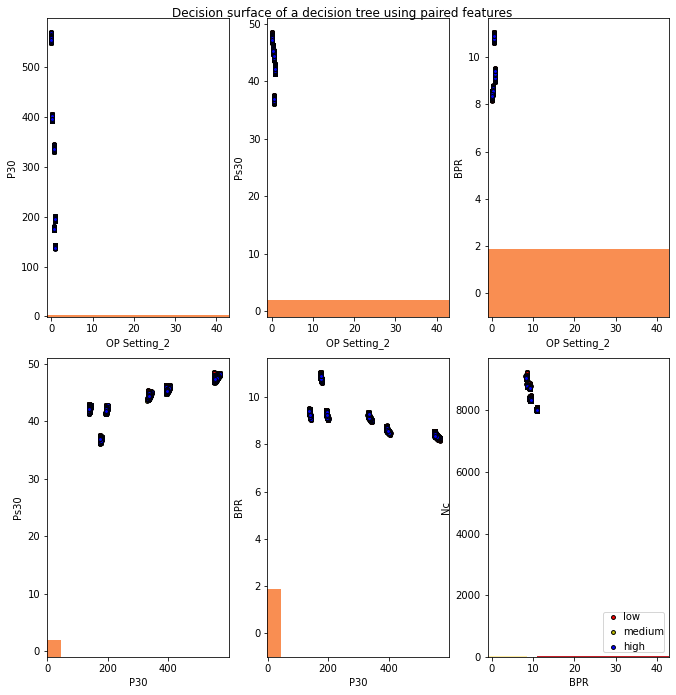

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
#fig, ax = plt.subplots(figsize=(10, 10))
plt.figure(figsize=(10,10))
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
y_train_code = le.fit_transform(y_train)
target_names =['low', 'medium', 'high']
# Load data
for pairidx, pair in enumerate([[1, 5], [1, 8], [1, 9],
                                [5, 8], [5, 9], [9, 7]
                                ]):
    # We only take the two corresponding features
    X = X_train[:, pair]
    y = y_train_code


    # Train
    clf = DecisionTreeClassifier(max_depth = 8,random_state = 42).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(features_names[pair[0]])
    plt.ylabel(features_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
#plt.axis("tight")

#plt.figure(figsize=(10, 10))
#plt.show()


#Plot the decision surface of a decision tree on the combined engine dataset

In [ ]:
# import numpy as np
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

In [ ]:

features_names=engine_df2[DT_feature_names].columns

n = len(features_names)

#y_train_code = le.fit_transform(y_train)
target_names =['low', 'medium', 'high']

# engine_df2['Risk_Level'] = engine_df2.target

# column_names = feature_names + ['Risk_Level']
class_names = target_names

In [ ]:
# engine_df2.shape

In [ ]:
len(engine_df2[DT_category_name])

160359

In [ ]:
# y = le.fit_transform(engine_df2[DT_category_name])

# colorscale="Viridis"
# plot_step = 0.02
# fig = make_subplots(rows=n - 1, cols=n - 1)

# for i in range(n - 1):
#   for j in range(i + 1, n):
#     X = engine_df2.iloc[:, [i, j]].values
    
#     dtree = DecisionTreeClassifier()
#     dtree.fit(X, y)

#     x_vis_0_min, x_vis_0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x_vis_1_min, x_vis_1_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#     x_vis_0 = np.arange(x_vis_0_min, x_vis_0_max, plot_step)
#     x_vis_1 = np.arange(x_vis_1_min, x_vis_1_max, plot_step)

#     XX_vis_0, XX_vis_1 = np.meshgrid(x_vis_0, x_vis_1)

#     yhat_vis = dtree.predict(np.c_[XX_vis_0.ravel(), XX_vis_1.ravel()])
#     YYhat_vis = yhat_vis.reshape(XX_vis_0.shape)
    
#     fig.add_trace(go.Contour(z=YYhat_vis,
#                             x=x_vis_0,
#                             y=x_vis_1,
#                             colorscale=colorscale,
#                             opacity=0.5,
#                             showscale=False), 
#                  row=j,
#                  col=i + 1)
#     fig.add_trace(go.Scatter(x=X[:, 0],
#                         y=X[:, 1],
#                         mode='markers',
#                         marker=dict(color=y,
#                                     line_width=1,
#                                     colorscale=colorscale),
#                         showlegend=False), 
#               row=j,
#               col=i + 1)
#     fig.update_xaxes(title_text=features_names[i], row=j, col=i + 1)
#     fig.update_yaxes(title_text=features_names[j], row=j, col=i + 1)

# fig.update_layout(height=(n - 1) * 400, 
#                  width=(n - 1) * 400, 
#                  title_text="Decision surface of a decision tree using paired features")
# fig.show()


## <font color='blue'> **Decision tree path:**

<font color='blue'> 7. Provide a description of the potential path along your tree that a given new data point
might take and provide its final result. The idea being that we want to know what decisions
would be made along the way for that data point to end up at a particular label.

For more informative kind of visualization, showing us the distributuion of points in different regions in the tree, we need a package [dtreeviz](https://github.com/parrt/dtreeviz) that is not included in Colab environment by default, so we install it:

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 204.2MB 73kB/s 
     |████████████████████████████████| 204kB 44.3MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.2-cp36-none-any.whl size=52359 sha256=513163bf5e63f5a3ff9b85a33ab4ca05dc41166fe6e23d84345b40056681a387
  Stored in directory: /root/.cache/pip/wheels/6c/42/13/06bfd7ecac5313d2bea233a1e1165fec14a4d3680fa856db57
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=637a1a6c7df03a4951a24b843c53af4ac71195f737e0d003aabb3a67decc31db
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


Now, we use the dtreeviz object in the trees submodule of dtreeviz to create the visualization:

In [ ]:
from dtreeviz.trees import dtreeviz
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
engine_df2

Unit_Number  Time_in_Cycles  OP Setting_1  ...      eHPC  Nf_err  Risk_Level
0                1               1       -0.0007  ...  0.596263    0.06         Low
1                1               2        0.0019  ...  0.596594    0.04         Low
2                1               3       -0.0043  ...  0.595495    0.08         Low
3                1               4        0.0007  ...  0.594166    0.11         Low
4                1               5       -0.0019  ...  0.594169    0.06         Low
...            ...             ...           ...  ...       ...     ...         ...
61244          249             251        9.9998  ...  0.600801    0.66        High
61245          249             252        0.0028  ...  0.597591    0.47        High
61246          249             253        0.0029  ...  0.599632    0.51        High
61247          249             254       35.0046  ...  0.597644    0.78        High
61248          249             255       42.0030  ...  0.598576    0.52        High

[160359 rows x 38 columns]

In [ ]:
y_preprocess = LabelEncoder()

X_tree = np.array(engine_df2[DT_feature_names].values)
y_tree = y_preprocess.fit_transform(engine_df2[DT_category_name].values)

class_names = y_preprocess.inverse_transform(np.arange(y_tree.max() + 1))

display(X_tree,y_tree)
class_names

array([[-7.00000000e-04, -4.00000000e-04,  6.41820000e+02, ...,
         1.91876227e-01,  5.96263446e-01,  6.00000000e-02],
       [ 1.90000000e-03, -3.00000000e-04,  6.42150000e+02, ...,
         1.92291521e-01,  5.96593836e-01,  4.00000000e-02],
       [-4.30000000e-03,  3.00000000e-04,  6.42350000e+02, ...,
         1.92543006e-01,  5.95494934e-01,  8.00000000e-02],
       ...,
       [ 2.90000000e-03,  0.00000000e+00,  6.43680000e+02, ...,
         1.94211409e-01,  5.99631777e-01,  5.10000000e-01],
       [ 3.50046000e+01,  8.40000000e-01,  5.55770000e+02, ...,
         1.91320150e-01,  5.97644231e-01,  7.80000000e-01],
       [ 4.20030000e+01,  8.40000000e-01,  5.49850000e+02, ...,
         1.90688370e-01,  5.98576383e-01,  5.20000000e-01]])

array([1, 1, 1, ..., 0, 0, 0])

array(['High', 'Low', 'Medium'], dtype=object)

In [ ]:
viz = dtreeviz(tree_model=engine_DT,
               x_data= X_tree,
               y_data= y_tree,
               target_name=label_name,
               feature_names=np.array(features_names),
               class_names=class_names.astype('str').tolist(),
               orientation ='LR',
               scale=2.0)              
display(viz)

NameError: ignored

In [ ]:
yhat_train = engine_DT.predict(X_train)

In [ ]:
cm = confusion_matrix(y_train, yhat_train)
display(cm)

plot_confusion_matrix(engine_DT, X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy on training data:", accuracy_score(y_train, yhat_train))

print("Precision on training data:", precision_score(y_train, yhat_train, average=None))

print("Recall on training data:", recall_score(y_train, yhat_train, average=None))

print("F1 score on training data:", f1_score(y_train, yhat_train, average=None))

In [ ]:
yhat_test = engine_DT.predict(X_test)

cm_test = confusion_matrix(y_test, yhat_test)
display(cm_test)

plot_confusion_matrix(engine_DT, X_test, y_test)

In [ ]:
print("Accuracy on test data:", accuracy_score(y_test, yhat_test))

print("Precision on test data:", precision_score(y_test, yhat_test, average=None))

print("Recall on test data:", recall_score(y_test, yhat_test, average=None))

print("F1 score on test data:", f1_score(y_test, yhat_test, average=None))

**<font color='blue'> Final Results of Test Data**

Comparing the results of training and test data sets - Accuracy and Precision reduced by 5%, Recall decreased by 4% and F1 Score also reduced by 5%.

## <font color = 'blue'> **Business Evaluation of Risk Evaluation**
<font color ='blue'>
1. What might be the motivation for a decision tree classifier?<br>

<font color ='black'>
The motivation behind a decision tree classifier would be to group a data set into meaningful distinct classes based on the distribution of the data.<br><br>
<font color ='blue'>
2. What is the “action” that should be taken given the results of this prediction?<br>
<font color ='black'>
The action that should be taken after the engine is given a risk level classification is to optimize the maintenance schedule of the engine and plan for replacement. This would concentrate maintenance resources on the higher risk engines and streamline the replacement process of components or entire engines.<br><br>
<font color ='blue'>
3. Who is the best immediate person(s) to make use of the results of your prediction?<br>
<font color ='black'>
The best immediate person to make use of these results is the the maintenance planner of the aircraft engine. This risk assessment is an early warning system based on onboard sensor data and is trained not to predict sudden failures, but slow wear over time. This will provide sufficient time for planners to prepare.<br><br>
<font color ='blue'>
4. What is the potential payoff of this prediction for an organization? (e.g. costs or efficiency).<br>
<font color ='black'>
The potential payoff of this prediction is significant cost savings in streamlining maintenance resources and maximizing usable life of these engines.<br><br>
<font color ='blue'>
5. Do your QuAMs results change your problem? If so, how and why? If not, please explain.<br>
<font color ='black'>
The results of this decision tree do not change our problem, but supplements the QuAM question of "Should this engine be replaced?" by providing more context to the health of the engine. This context is provided by sensor information other than the calculated RUL to determine the health of the engine.

##<font color='blue'> ***End of PA2***